<a href="https://colab.research.google.com/github/andydaehn/Drug_Classification/blob/main/Drug_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drug Classification

In [23]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from IPython.display import display # Allows the use of display() for DataFrames


# # Pretty display for notebooks
# %matplotlib inline

# # Set a random seed
# import random
# random.seed(42)



# Load the dataset
feat_df = pd.read_csv('drug200.csv')


# Print the first entries of the Drug200 dataset
feat_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [24]:
# Get basic information
feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [25]:
# Description of numerical values in the data
feat_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [26]:
# Check for duplicate rows
feat_df.duplicated().sum()

0

In [27]:
# Check for NaN values
feat_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [28]:
# Check the number of unique values in each column
feat_df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [29]:
# Combine all numerical features
numerical_cols = feat_df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['Age', 'Na_to_K']

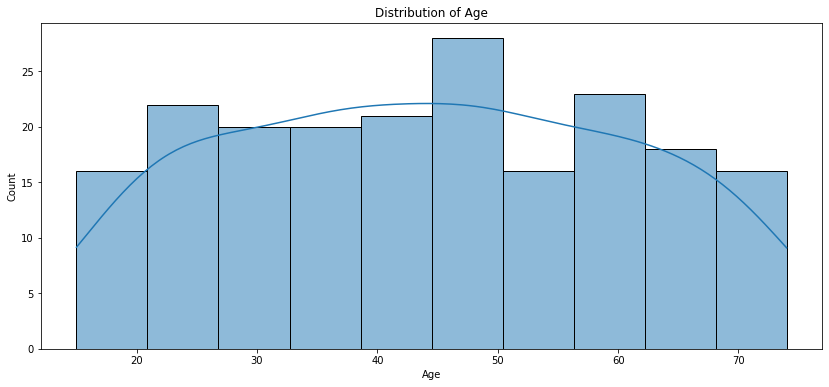

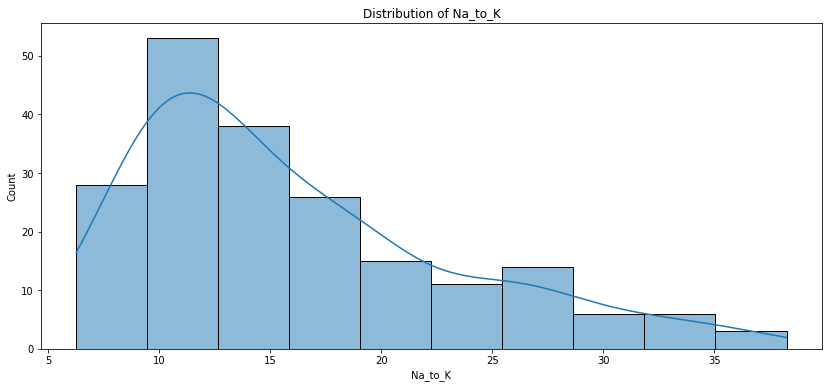

In [30]:
# Plot numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14,6))
    sns.histplot(data=feat_df,x=col,bins=10,kde=True)
    plt.title(f"Distribution of {col}")

In [31]:
# Combine all categorical features
categorical_cols=feat_df.select_dtypes(include=object).columns.to_list()
categorical_cols

['Sex', 'BP', 'Cholesterol', 'Drug']

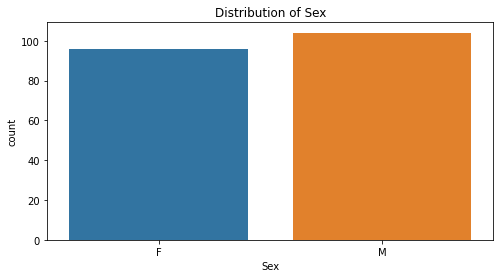

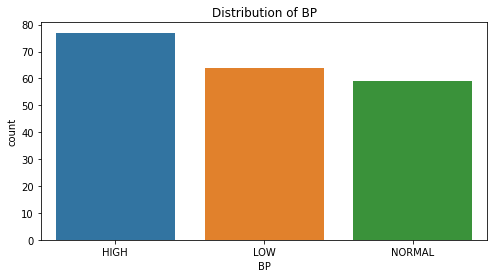

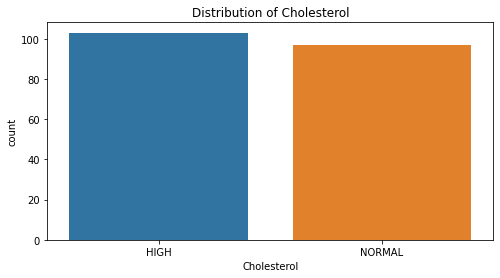

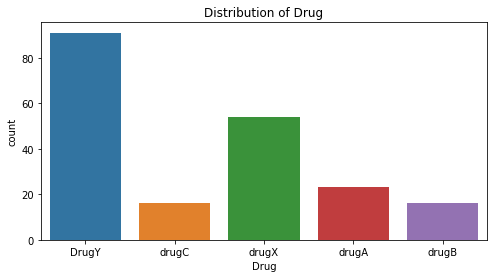

In [32]:
# Plot categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=feat_df,x=col)
    plt.title(f"Distribution of {col}")

Drug Y is widely used compared to other drugs, assign class weights to balance this situation.

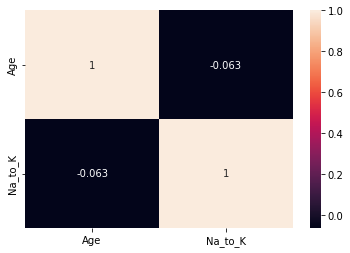

In [33]:
# Correlation matrix for feat_df 
corr_matx = feat_df.corr()
sns.heatmap(corr_matx, annot=True)
plt.show()

In [34]:
'''If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.'''



# Skewness and kurtosis
print("Skewness: %f" % feat_df['Na_to_K'].skew())
print("Kurtosis: %f" % feat_df['Na_to_K'].kurt())

Skewness: 1.039341
Kurtosis: 0.379979


In [35]:
# Use log1p to adjust the skewness and kurtosis
feat_df['Na_to_K'] = np.log1p(feat_df['Na_to_K'])

# Skewness and kurtosis
print("Skewness: %f" % feat_df['Na_to_K'].skew())
print("Kurtosis: %f" % feat_df['Na_to_K'].kurt())

Skewness: 0.350931
Kurtosis: -0.711525


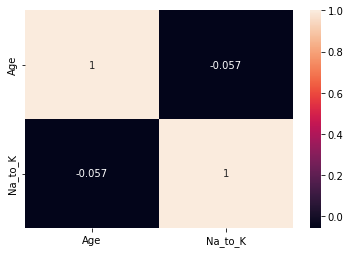

In [36]:
# Correlation matrix for feat_df 
corr_matx = feat_df.corr()
sns.heatmap(corr_matx, annot=True)
plt.show()

Bivariate Analysis

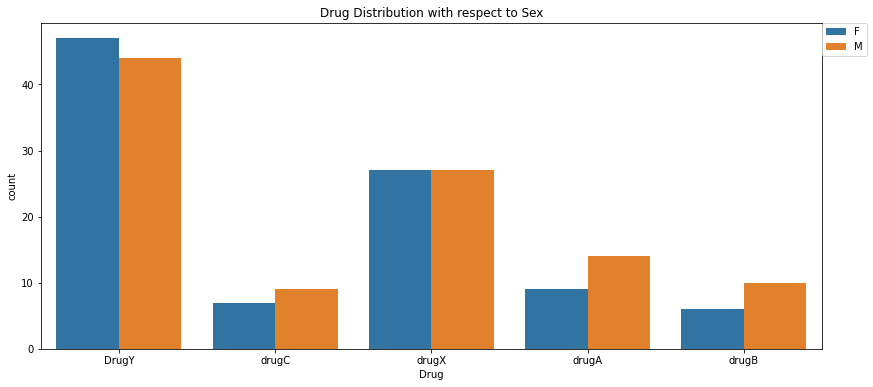

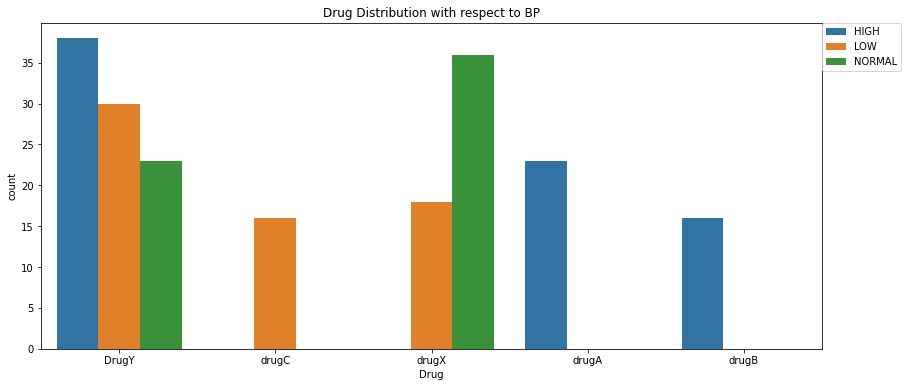

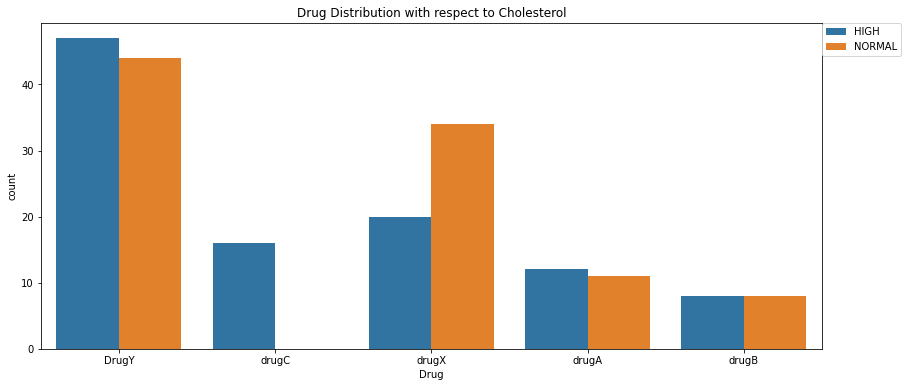

In [37]:

for col in categorical_cols:
    if col=='Drug':
        continue   
    plt.figure(figsize=(14,6))
    sns.countplot(data=feat_df,x='Drug',hue=col)
    plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left',borderaxespad=0)
    plt.title(f"Drug Distribution with respect to {col}")

Encode cat values

In [38]:
for col in categorical_cols:
    feat_df[col]=feat_df[col].astype('category').cat.codes

In [39]:
# Create X and y 
y_df = feat_df[['Drug']]
X_df = feat_df.drop(columns=['Drug'])


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [41]:
# # Import the classifier from sklearn
# from sklearn.ensemble import RandomForestClassifier

# # TODO: Define the classifier, and fit it to the data
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [42]:
# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculate the accuracy
# from sklearn.metrics import accuracy_score
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 1.0


In [43]:


# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculating accuracies
# # train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 1.0


In [44]:
# # Import the classifier from sklearn
# from sklearn.tree import DecisionTreeClassifier

# # TODO: Define the classifier, and fit it to the data
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculate the accuracy
# from sklearn.metrics import accuracy_score
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 1.0


In [46]:
# # Training the model
# model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
# model.fit(X_train, y_train)

# # Making predictions
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Calculating accuracies
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print('The training accuracy is', train_accuracy)
# print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 1.0
